# Red Wine Quality - Exploratory Data Analysis

### Table of Contents
(the links doesn't work on GitHub)

* [1. Load & explore data](#P01)
    * [Check the columns names & types](#P012)
    * [Check the range of values](#P013)
    * [Check the missing values](#P014)
    * [Check the target variable](#P015)
* [2. Feature selection](#P02)
    * [Density plots](#P021)
    * [Boxplots](#P022)
    * [Correlation matrix](#P023)
    * [Select columns](#P024)
* [3. Split the dataset](#P03)
* [4. Try various *regression* models](#P04)
    * [Linear Regression](#P04_linear_regression)
    * [Decision Tree](#P04_decision_tree)
        * [Search best max_depth](#P04_decision_tree_max_d)
        * [Search best min_samples_leaf](#P04_decision_tree_min_samples_leaf)
    * [Random Forest](#P04_random_forest)
        * [Search best n_estimators](#P04_random_forest_n_estimators)
        * [Search best max_depth](#P04_random_forest_max_d)
    * [XGBoost](#P04_xgboost)
        * [Search best eta](#P04_xgboost_eta)
        * [Search best max_depth](#P04_xgboost_max_depth)
        * [Search best min_child_weight](#P04_xgboost_min_child_weight)
    * [Model selection](#P04_result)
* [5. Export the selected model](#P05)
    * [Train the model](#P05_train)
    * [Export the model](#P05_export)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm, notebook

# 1. Load & explore data <a class="anchor" id="P01"></a>

In [18]:
data = pd.read_csv('winequality-red.csv', sep=';', decimal='.')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Rename the columns <a class="anchor" id="P011"></a>

In [19]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

### Check the columns names & types <a class="anchor" id="P012"></a>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check the ranges of values <a class="anchor" id="P013"></a>

In [21]:
data.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check the missing values <a class="anchor" id="P014"></a>

In [22]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> There is no missing values, so we don't need to handle it this time.

### Check the target variable <a class="anchor" id="P015"></a>

In [23]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

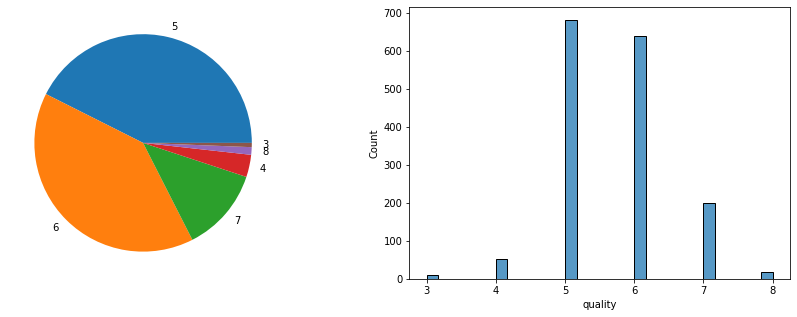

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
fig = plt.figure(figsize=[15,5])

plt.subplot(1,2,2)
sns.histplot(data['quality'])

plt.subplot(1,2,1)
check = data['quality'].value_counts()
plt.pie(list(check), labels=check.keys())

plt.show()
check

> The dataset is imbalanced toward the middle scores (5,6)... So we will need to use an appropriate metric.
>
> However there is no longtail to consider as the values are restricted to 10

# 2. Feature selection <a class="anchor" id="P02"></a>

### Density plots <a class="anchor" id="P021"></a>

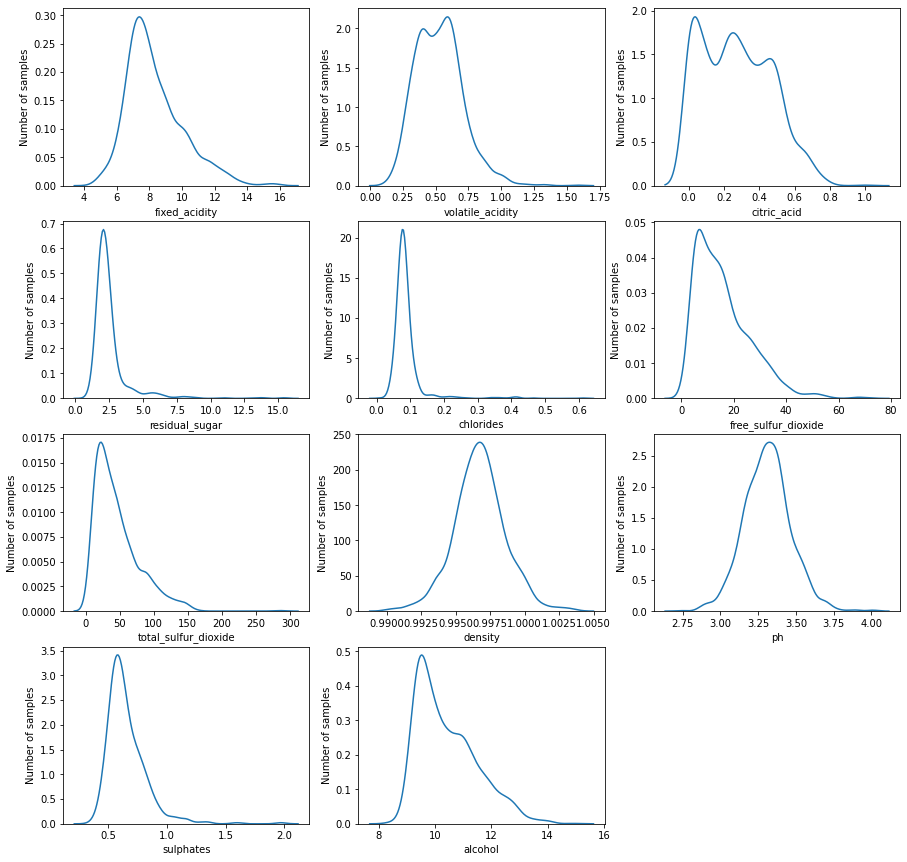

In [25]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    #plt.hist(data[c], bins=50, alpha=.75)
    #plt.plot(data[c])
    sns.kdeplot(data[c])
    plt.ylabel("Number of samples")
    plt.xlabel(c)

plt.show()

### Boxplots <a class="anchor" id="P022"></a>

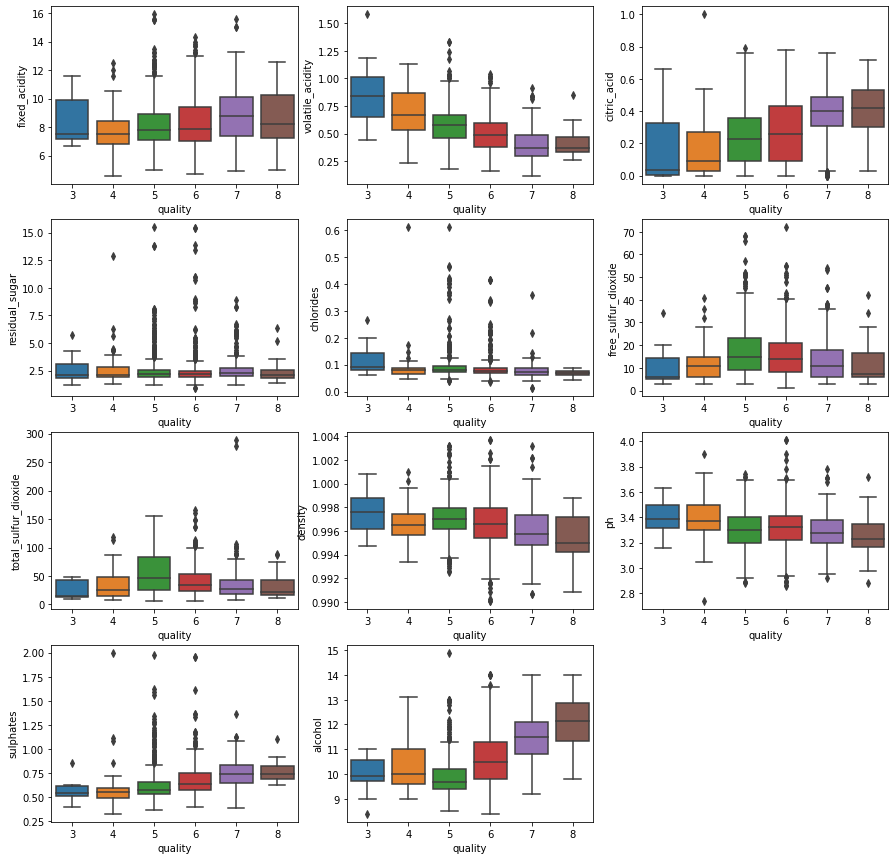

In [26]:
figure = plt.figure(figsize=[15,15])

for i,c in enumerate(data.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality', y=c, notch=False, data=data)
    plt.ylabel(c)
    plt.xlabel('quality')

plt.show()

### **----- Comment -----**

> `volatile_acidity`, `density` and maybe `pH` seems negatively correlated.
>
> `citric_acid`, `alcohol`, `sulphates` and maybe `fixed_acicity` seems positively correlated.
>
> Let's confirm this with a correlation matrix.

### Correlation Matrix <a class="anchor" id="P023"></a>

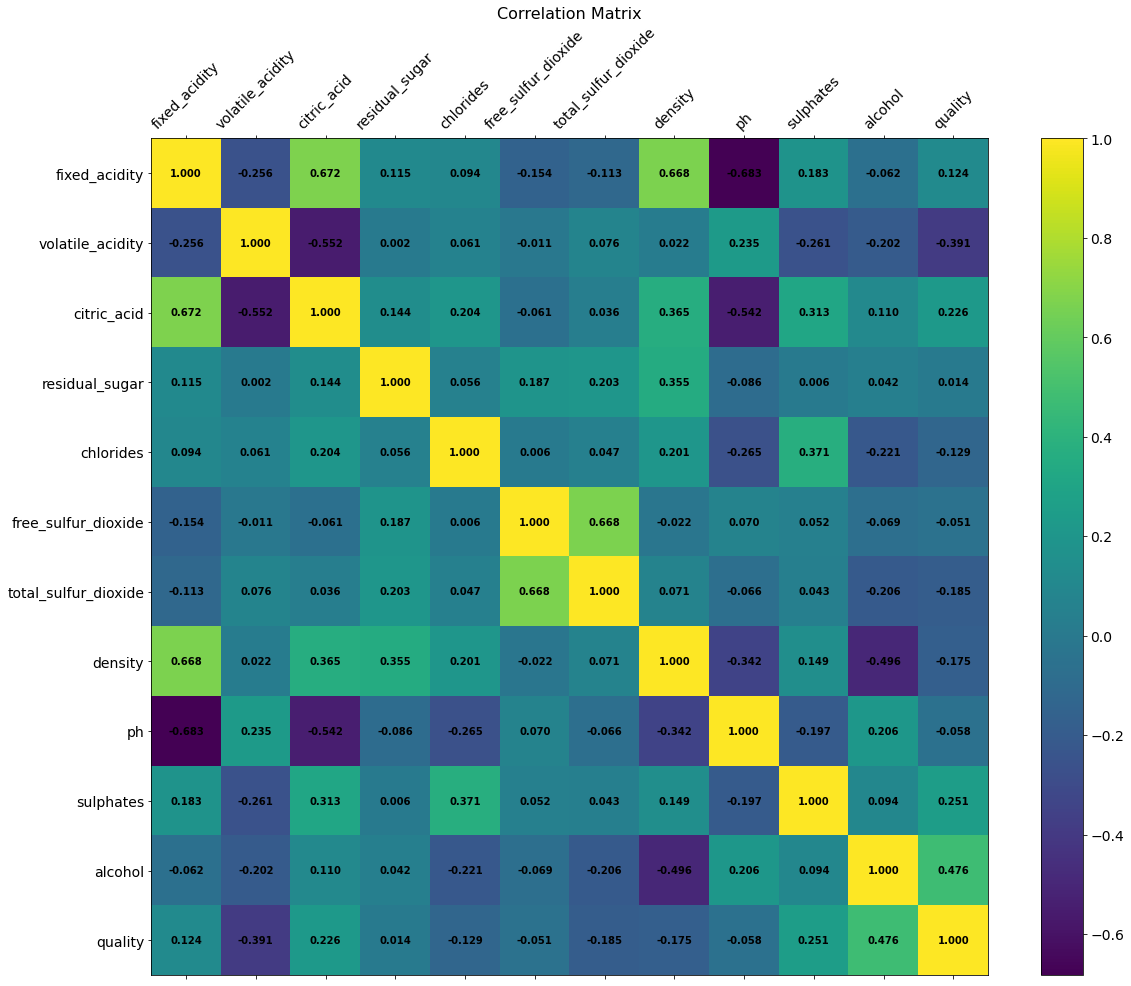

In [27]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

for (i, j), z in np.ndenumerate(data.corr()):
    plt.text(j, i, f"{z:0.3f}", ha='center', va='center', fontweight='demibold')

plt.title('Correlation Matrix', fontsize=16);

In [28]:
selection = data.corrwith(data['quality']).agg('abs').sort_values(ascending=False)
selection

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
ph                      0.057731
free_sulfur_dioxide     0.050656
residual_sugar          0.013732
dtype: float64

### Select columns with correlation > 0.1 <a class="anchor" id="P024"></a>

In [29]:
selected_columns = selection.index[selection > 0.15]
#selected_columns = selected_columns.drop(['quality'])
selected_columns

Index(['quality', 'alcohol', 'volatile_acidity', 'sulphates', 'citric_acid',
       'total_sulfur_dioxide', 'density'],
      dtype='object')

In [30]:
df = data[selected_columns]
df.head(5)

,quality,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,5,9.4,0.70,0.56,0.00,34.0,0.9978
1,5,9.8,0.88,0.68,0.00,67.0,0.9968
2,5,9.8,0.76,0.65,0.04,54.0,0.9970
3,6,9.8,0.28,0.58,0.56,60.0,0.9980
4,5,9.4,0.70,0.56,0.00,34.0,0.9978


# 3. Split the dataset <a class="anchor" id="P03"></a>

### Split the predictors and the target 

In [31]:
y_full = df['quality']
y_full.head(2)

0    5
1    5
Name: quality, dtype: int64

In [32]:
dt_full = df.copy()
dt_full = dt_full.drop(columns='quality')
dt_full.head(2)

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,9.4,0.70,0.56,0.0,34.0,0.9978
1,9.8,0.88,0.68,0.0,67.0,0.9968


### Create train, validation, test (& full_train) splits

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
dt_train_full, dt_test, y_train_full, y_test = train_test_split(dt_full, y_full, test_size=0.2, random_state=42)
dt_train, dt_valid, y_train, y_valid = train_test_split(dt_train_full, y_train_full, test_size=dt_test.shape[0], random_state=42)

In [35]:
assert(dt_valid.shape[0] == dt_test.shape[0])

In [36]:
assert(dt_full.shape[0] == dt_train.shape[0] + dt_valid.shape[0] + dt_test.shape[0])

# 4. Try various *regression* models <a class="anchor" id="P04"></a>

In [37]:
X_train = dt_train.values
X_valid = dt_valid.values
X_test = dt_test.values

In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, verbose=1):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    if verbose > 0:
        print(f"R²:{r2:6.3f} | RMSE:{rmse:6.3f} | MAE:{mae:6.3f}")
    return r2, rmse, mae

## Linear Regression  <a class="anchor" id="P04_linear_regression"></a>

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
linear_model = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [98]:
y_pred = linear_model.predict(X_valid)

In [99]:
_, _, _ = evaluate_regression(y_valid, y_pred)

R²: 0.267 | RMSE: 0.682 | MAE: 0.512


### **----- FINAL RESULT -----**

> the best RMSE for a basic **Linear Regression** appears to be around `0.682`
---

## Decision Tree (regression) <a class="anchor" id="P04_decision_tree"></a>

In [100]:
from sklearn.tree import DecisionTreeRegressor

### Train a basic model

In [101]:
dtree_model = DecisionTreeRegressor(random_state=1)

In [102]:
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [103]:
y_pred = dtree_model.predict(X_valid)

In [104]:
_, _, _ = evaluate_regression(y_valid, y_pred)

R²:-0.093 | RMSE: 0.833 | MAE: 0.494


### **----- TMP RESULT -----**

> the best RMSE with the *default* Decision Tree appears to be around `0.833`
---

### Search best `max_depth`  <a class="anchor" id="P04_decision_tree_max_d"></a>

In [105]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeRegressor(max_depth=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    print(f"max_depth:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_regression(y_valid, y_pred)

  0%|          | 0/13 [00:00<?, ?it/s]

max_depth:  1  =>  R²: 0.110 | RMSE: 0.752 | MAE: 0.642
max_depth:  2  =>  R²: 0.202 | RMSE: 0.712 | MAE: 0.558
max_depth:  3  =>  R²: 0.267 | RMSE: 0.682 | MAE: 0.529
max_depth:  4  =>  R²: 0.254 | RMSE: 0.688 | MAE: 0.527
max_depth:  5  =>  R²: 0.286 | RMSE: 0.673 | MAE: 0.515
max_depth:  6  =>  R²: 0.139 | RMSE: 0.739 | MAE: 0.535
max_depth:  7  =>  R²: 0.076 | RMSE: 0.766 | MAE: 0.537
max_depth:  8  =>  R²: 0.061 | RMSE: 0.772 | MAE: 0.536
max_depth:  9  =>  R²: 0.029 | RMSE: 0.785 | MAE: 0.536
max_depth: 10  =>  R²: 0.008 | RMSE: 0.794 | MAE: 0.546
max_depth: 15  =>  R²:-0.084 | RMSE: 0.830 | MAE: 0.497
max_depth: 20  =>  R²:-0.093 | RMSE: 0.833 | MAE: 0.494
max_depth: 25  =>  R²:-0.093 | RMSE: 0.833 | MAE: 0.494


Text(0.5, 0, 'max_depth')

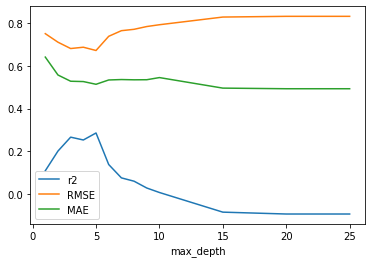

In [106]:
plt.plot(scores.keys(), scores.values(), label=['r2','RMSE','MAE'])
plt.legend()
plt.xlabel("max_depth")

### **----- TMP RESULT -----**

> the best RMSE with Decision Tree appears to be around `0.673` with `max_depth=5`
---

### Search best `min_samples_leaf`  <a class="anchor" id="P04_decision_tree_min_samples_leaf"></a>

In [107]:
scores = {}
values = values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
max_d = 5

for v in notebook.tqdm(values):
    dtree_model = DecisionTreeRegressor(max_depth=max_d, min_samples_leaf=v, random_state=1)
    dtree_model.fit(X_train, y_train)
    y_pred = dtree_model.predict(X_valid)
    print(f"min_samples_leaf:{int(v):3}  =>  ", end="")
    scores[int(v)] = evaluate_regression(y_valid, y_pred)

  0%|          | 0/13 [00:00<?, ?it/s]

min_samples_leaf:  1  =>  R²: 0.286 | RMSE: 0.673 | MAE: 0.515
min_samples_leaf:  2  =>  R²: 0.250 | RMSE: 0.690 | MAE: 0.510
min_samples_leaf:  3  =>  R²: 0.250 | RMSE: 0.690 | MAE: 0.510
min_samples_leaf:  4  =>  R²: 0.260 | RMSE: 0.685 | MAE: 0.505
min_samples_leaf:  5  =>  R²: 0.279 | RMSE: 0.677 | MAE: 0.503
min_samples_leaf:  6  =>  R²: 0.256 | RMSE: 0.687 | MAE: 0.512
min_samples_leaf:  7  =>  R²: 0.253 | RMSE: 0.688 | MAE: 0.510
min_samples_leaf:  8  =>  R²: 0.249 | RMSE: 0.691 | MAE: 0.514
min_samples_leaf:  9  =>  R²: 0.268 | RMSE: 0.682 | MAE: 0.507
min_samples_leaf: 10  =>  R²: 0.292 | RMSE: 0.670 | MAE: 0.500
min_samples_leaf: 15  =>  R²: 0.264 | RMSE: 0.684 | MAE: 0.512
min_samples_leaf: 20  =>  R²: 0.271 | RMSE: 0.680 | MAE: 0.509
min_samples_leaf: 25  =>  R²: 0.288 | RMSE: 0.672 | MAE: 0.507


Text(0.5, 0, 'min_samples_leaf')

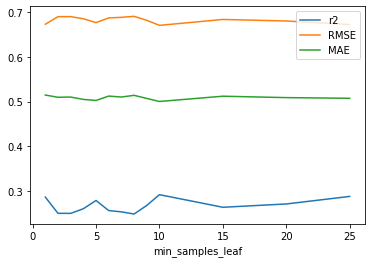

In [108]:
plt.plot(scores.keys(), scores.values(), label=['r2','RMSE','MAE'])
plt.legend()
plt.xlabel("min_samples_leaf")

### **----- FINAL RESULT -----**

> the best RMSE for a **Decision Tree** appears to be around `0.670` with `max_depth=5` and `min_samples_leaf=10`
>
> That doesn't seem promising, so we will stop here for now and see other methods.
---

## Random forest (regression) <a class="anchor" id="P04_random_forest"></a>

In [109]:
from sklearn.ensemble import RandomForestRegressor

### Train a basic model

In [110]:
rforest_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [111]:
rforest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [112]:
y_pred = rforest_model.predict(X_valid)

In [113]:
_, _, _ = evaluate_regression(y_valid, y_pred)

R²: 0.318 | RMSE: 0.658 | MAE: 0.472


### **----- TMP RESULT -----**

> the RMSE with the ***default* Decision Tree** appears to be around `0.658`
---

### Search best `n_estimators`  <a class="anchor" id="P04_random_forest_n_estimators"></a>

In [114]:
scores = {}
values = np.linspace(10,400,40)

for v in notebook.tqdm(values):
    rforest_model = RandomForestRegressor(n_estimators=int(v), random_state=1, n_jobs=-1)
    rforest_model.fit(X_train, y_train)
    y_pred = rforest_model.predict(X_valid)
    # print(f"n_estimators:{int(v):4}  =>  ", end="")
    scores[int(v)] = evaluate_regression(y_valid, y_pred, verbose=0)

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 0, 'n_estimators')

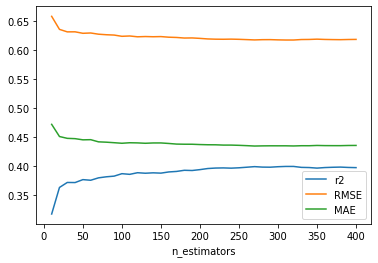

In [115]:
plt.plot(scores.keys(), scores.values(), label=['r2','RMSE','MAE'])
plt.legend()
plt.xlabel("n_estimators")

### Search best `max_depth` / `n_estimators` combination <a class="anchor" id="P04_random_forest_max_d"></a>

In [116]:
scores = {'r2':{}, 'rmse':{}, 'mae':{}}

for max_d in notebook.tqdm([10,15,20,25]):
    #scores[max_d] = {'r2':{}, 'rmse':{}, 'mae':{}}
    scores['r2'][max_d] = {}
    scores['rmse'][max_d] = {}
    scores['mae'][max_d] = {}
    
    for ne in notebook.tqdm(np.linspace(20,400,40)):
        
        rforest_model = RandomForestRegressor(n_estimators=int(ne), random_state=1, n_jobs=-1, max_depth=max_d)
        rforest_model.fit(X_train, y_train)
        y_pred = rforest_model.predict(X_valid)

        #tqdm.write(f"max_depth:{max_d:3} - n_estimators:{int(ne):4}  =>  ", end="")
        r2, rmse, mae = evaluate_regression(y_valid, y_pred, verbose=0)
        scores['r2'][max_d][int(ne)] = r2
        scores['rmse'][max_d][int(ne)] = rmse
        scores['mae'][max_d][int(ne)] = mae

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

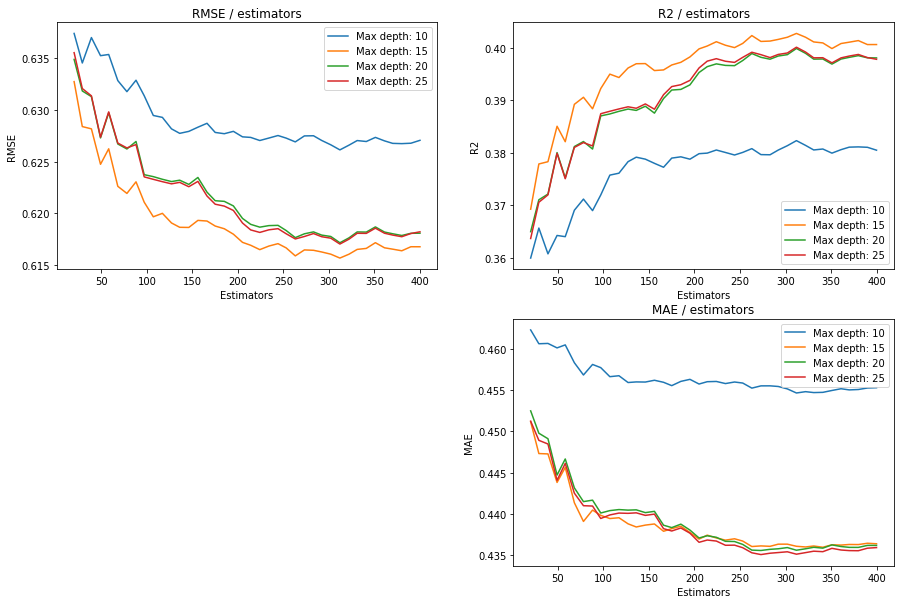

In [117]:
fig = plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
for k,v in scores['rmse'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("RMSE")
plt.title("RMSE / estimators")
plt.legend()

plt.subplot(2,2,2)
for k,v in scores['r2'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("R2")
plt.title("R2 / estimators")
plt.legend()

plt.subplot(2,2,4)
for k,v in scores['mae'].items():
    plt.plot(v.keys(), v.values(), label=f"Max depth: {k}")
    
plt.xlabel("Estimators")
plt.ylabel("MAE")
plt.title("MAE / estimators")
plt.legend()

plt.show()

In [118]:
for i, v in scores['rmse'].items():
    #print("coucou", i, v)
    print(f"max_depth:{i:3} - ", end="")
    z1 = pd.Series([w for j,w in v.items()])
    z2 = pd.Series([j for j,w in v.items()])
    print(f"n_estimators:{z2[z1.idxmin()]}  =>  min RMSE:{z1.min()}")
    #print(f"eta:{k:5} - min RMSE:{min(v)}")

max_depth: 10 - n_estimators:312  =>  min RMSE:0.6261295430609131
max_depth: 15 - n_estimators:312  =>  min RMSE:0.6157029921353079
max_depth: 20 - n_estimators:312  =>  min RMSE:0.6171786660961027
max_depth: 25 - n_estimators:312  =>  min RMSE:0.6170520912242964


### **----- FINAL RESULT -----**

> the best RMSE for a **RandomForest** appears to be around `0.615` with a `max_depth=15` and a `n_estimator=312`
>
> That is interesting, be let see if we can do better with another method.
---

## XGboost (regression) <a class="anchor" id="P04_xgboost"></a>

In [119]:
import xgboost as xgb

### Progress Bar

In [120]:
class xgb_progress(xgb.callback.TrainingCallback):
    """ Custom class used to create tqdm callbacks with XGBoost
        example: xgb_progressbar = xgb_progress(num_rounds)
                 xgb.train( ... , callbacks=[xgb_progressbar])
    """
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.pbar = notebook.tqdm(total=rounds)
        
    def after_iteration(self, model, epoch, evals_log):
        self.pbar.update(1)

### Create DMatrix for train and validation

In [121]:
features = dt_full.columns
df_train_xgb = xgb.DMatrix(X_train, label=y_train, feature_names=features)
df_valid_xgb = xgb.DMatrix(X_valid, label=y_valid, feature_names=features)

### Create a watchlist

In [122]:
watchlist = [(df_train_xgb, 'train'), (df_valid_xgb, 'val')]

### Train a basic model

In [123]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    #'objective': 'binary:logistic', # <-- for binary classification
    #'eval_metric': 'auc',           # <-- for binary classification, default according to objective
    
    'objective': 'reg:squarederror', # <-- for regression 
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

num_rounds = 100
early_stop = 10

In [124]:
xgb_progressbar = xgb_progress(num_rounds)

progress = dict()

xgb_model = xgb.train(
                        xgb_params, 
                        df_train_xgb, 
                        num_boost_round=num_rounds, 
                        early_stopping_rounds=early_stop,
                        verbose_eval=0, 
                        evals=watchlist,
                        callbacks=[xgb_progressbar],
                        evals_result=progress,
                        )

  0%|          | 0/100 [00:00<?, ?it/s]

In [125]:
xgb_model.best_ntree_limit-1

39

In [126]:
progress['train']['rmse'][-5:]

[0.182833, 0.181151, 0.175854, 0.173741, 0.171857]

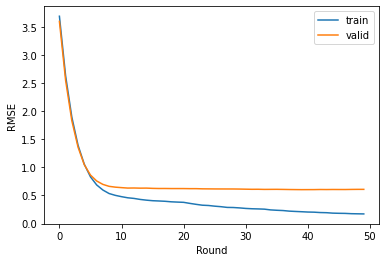

In [127]:
plt.plot(progress['train']['rmse'], label='train')
plt.plot(progress['val']['rmse'], label='valid')

plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()

### Search best `eta`  <a class="anchor" id="P04_xgboost_eta"></a>

In [130]:
xgb_progressbar = xgb_progress(num_rounds*3)

scores = {}

for eta_v in [0.01, 0.1, 0.3]:
    
    progress = dict()

    xgb_params['eta'] = eta_v

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\neta:{eta_v} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[eta_v] = progress['val']['rmse']

  0%|          | 0/300 [00:00<?, ?it/s]

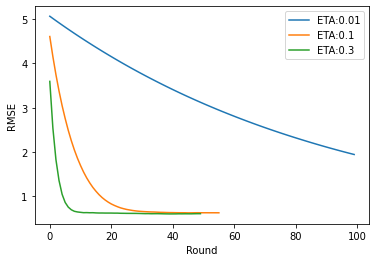

In [131]:
for k,v in scores.items():
    plt.plot(v, label=f"ETA:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()

In [132]:
for k,v in scores.items():
    print(f"eta:{k:5} - min RMSE:{min(v)}")

eta: 0.01 - min RMSE:1.944356
eta:  0.1 - min RMSE:0.62747
eta:  0.3 - min RMSE:0.603329


### **----- TMP RESULT -----**

> the best RMSE for a **XBoost Regression** appears to be around `0.603` with an `eta=0.3`
---

### Search best `max_depth`  <a class="anchor" id="P04_xgboost_max_depth"></a>

In [133]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.3

for max_d in values:
    
    progress = dict()

    xgb_params['max_depth'] = max_d

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\nmax_depth:{max_d} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[max_d] = progress['val']['rmse']

  0%|          | 0/1300 [00:00<?, ?it/s]

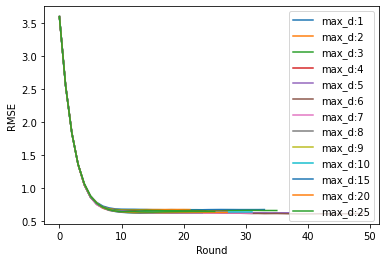

In [134]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()

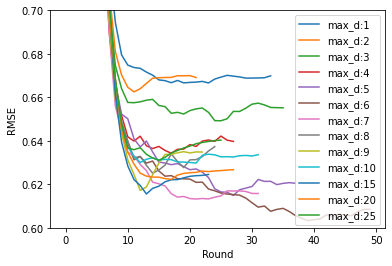

In [135]:
for k,v in scores.items():
    plt.plot(v, label=f"max_d:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.ylim(0.6,0.7)
plt.legend()

In [136]:
for k,v in scores.items():
    print(f"max_d:{k:2} - min rmse:{min(v)}")

max_d: 1 - min rmse:0.666616
max_d: 2 - min rmse:0.662512
max_d: 3 - min rmse:0.649227
max_d: 4 - min rmse:0.634299
max_d: 5 - min rmse:0.614862
max_d: 6 - min rmse:0.603329
max_d: 7 - min rmse:0.613235
max_d: 8 - min rmse:0.625132
max_d: 9 - min rmse:0.617203
max_d:10 - min rmse:0.629768
max_d:15 - min rmse:0.615545
max_d:20 - min rmse:0.622273
max_d:25 - min rmse:0.631054


### **----- TMP RESULT -----**

> the best RMSE for a **XBoost Regression** appears to be around `0.603` with an `eta=0.3` and a `max_depth=6`
---

### Search best `min_child_weight`  <a class="anchor" id="P04_xgboost_min_child_weight"></a>

In [137]:

values = [1,2,3,4,5,6,7,8,9,10,15,20,25]
xgb_progressbar = xgb_progress(num_rounds*len(values))

scores = {}
xgb_params['eta'] = 0.3
xgb_params['max_depth'] = 6

for min_c in values:
    
    progress = dict()

    xgb_params['min_child_weight'] = min_c

    xgb_model = xgb.train(
        xgb_params, 
        df_train_xgb, 
        num_boost_round=num_rounds, 
        early_stopping_rounds=early_stop,
        verbose_eval=0, 
        evals=watchlist,
        callbacks=[xgb_progressbar],
        evals_result=progress,
    )
    
    # print(f"\nmin_child_weight:{min_c} best_ntree_limit:{xgb_model.best_ntree_limit-1}\n")
    
    scores[min_c] = progress['val']['rmse']

  0%|          | 0/1300 [00:00<?, ?it/s]

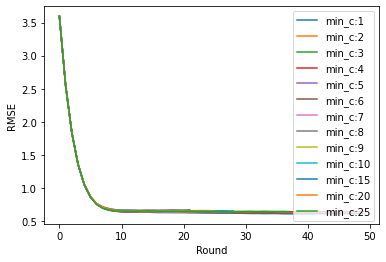

In [138]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.legend()

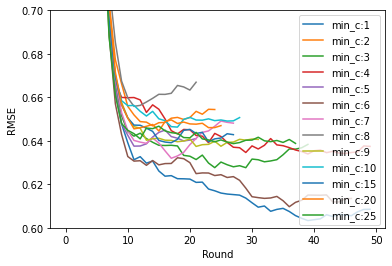

In [139]:
for k,v in scores.items():
    plt.plot(v, label=f"min_c:{k}")
plt.xlabel("Round")
plt.ylabel("RMSE")
plt.ylim(0.6,0.7)
plt.legend()

In [140]:
for k,v in scores.items():
    print(f"min_child_weight:{k:2} - min rmse:{min(v)}")

min_child_weight: 1 - min rmse:0.603329
min_child_weight: 2 - min rmse:0.646894
min_child_weight: 3 - min rmse:0.627651
min_child_weight: 4 - min rmse:0.633948
min_child_weight: 5 - min rmse:0.637553
min_child_weight: 6 - min rmse:0.609703
min_child_weight: 7 - min rmse:0.63198
min_child_weight: 8 - min rmse:0.655861
min_child_weight: 9 - min rmse:0.637429
min_child_weight:10 - min rmse:0.646308
min_child_weight:15 - min rmse:0.639131
min_child_weight:20 - min rmse:0.644525
min_child_weight:25 - min rmse:0.638709


### **----- FINAL XGBoost RESULT -----**

> the best RMSE for a **XBoost Regression** appears to be around `0.603` with an `eta=0.3`, a `max_depth=6`,  a `min_child_weight=1` and a `best_ntree_limit=40`
---

## Model results <a class="anchor" id="P04_result"></a>

* the best RMSE for a **basic Linear Regression** appears to be around `0.682`
* the best RMSE for a **Decision Tree** appears to be around `0.670` with `max_depth=5` and `min_samples_leaf=10`
* the best RMSE for a **RandomForest** appears to be around `0.615` with a `max_depth=15` and a `n_estimator=312`
* the best RMSE for a **XBoost Regression** appears to be around `0.603` with an `eta=0.3`, a `max_depth=6`,  a `min_child_weight=1` and a `best_ntree_limit=40`


> The XGBoost Regressor model appears to be the best model at the moment *(but we could try more models and finetune more parameters)*.

**Let's export the XGBoost model**

# 5. Export the selected model <a class="anchor" id="P05"></a>

### Train a XGBoost Regression model with the best parameters and the train_full dataset <a class="anchor" id="P05_train"></a>

In [161]:
xgb_model2 = xgb.XGBRegressor(
    n_estimators=num_rounds,
    learning_rate=0.3, 
    max_depth=6, 
    min_child_weight=1, 
    objective='reg:squarederror', 
    random_state=1, 
    verbose=0,
)

In [162]:
watchlist = [(dt_train_full, y_train_full), (dt_test, y_test)]

In [163]:
xgb_model2.fit(dt_train_full, y_train_full, eval_set=watchlist, early_stopping_rounds=early_stop, verbose=0)

[05:29:58] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbose=0, verbosity=None)

In [164]:
y_pred = xgb_model2.predict(dt_test)

In [166]:
_, _, _ = evaluate_regression(y_test, y_pred)

R²: 0.453 | RMSE: 0.598 | MAE: 0.459


The `test set RMSE` is close to the `validation set RMSE`, it should be OK

### Save the model <a class="anchor" id="P05_export"></a>

In [167]:
xgb_model2.save_model('model_regression.txt')

## TO-TEST (later)

In [ ]:
xgb_model.best_ntree_limit